In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
#Generate cities list
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

In [3]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# make a new list to append to for each column
weather_data = []

# Build query URL and request your results in Farenheit 

for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    pprint.pprint(weather_json)
    try:
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        max_temp = weather_json["main"]["temp_max"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        lat = weather_json["coord"]["lat"]
        long = weather_json["coord"]["lon"]
        
     #append to each list  
        weather_data.append({
    "City": city,
    "Temp": temperature,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Cloudiness": cloudiness,
    "Max Temp": max_temp,
    "Country": country,
    "Date": date,
    "Latitude": lat,
    "Longditude": long
    
})
    except KeyError:
        print("Skipping city "+ city)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -20.63, 'lon': -46},
 'dt': 1555690087,
 'id': 3453439,
 'main': {'grnd_level': 904.878,
          'humidity': 53,
          'pressure': 1015.702,
          'sea_level': 1015.702,
          'temp': 76.91,
          'temp_max': 76.91,
          'temp_min': 76.91},
 'name': 'Ponta do Sol',
 'sys': {'country': 'BR',
         'message': 0.0047,
         'sunrise': 1555665379,
         'sunset': 1555706977},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 286.503, 'speed': 3.13}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 39.95, 'lon': -94.76},
 'dt': 1555690024,
 'id': 4407665,
 'main': {'humidity': 17,
          'pressure': 1018,
          'temp': 54.81,
          'temp_max': 57.99,
          'temp_min': 52},
 'name': 'Kodiak',
 'sys': {'country': 'US',
         'id': 4022,
         'me

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -3.38, 'lon': -68.87},
 'dt': 1555690132,
 'id': 3662252,
 'main': {'grnd_level': 1003.902,
          'humidity': 67,
          'pressure': 1012.27,
          'sea_level': 1012.27,
          'temp': 88.25,
          'temp_max': 88.25,
          'temp_min': 88.25},
 'name': 'Sao Paulo de Olivenca',
 'rain': {'3h': 0.938},
 'sys': {'country': 'BR',
         'message': 0.0043,
         'sunrise': 1555670022,
         'sunset': 1555713309},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 50.385, 'speed': 2.42}}
{'base': 'stations',
 'clouds': {'all': 66},
 'cod': 200,
 'coord': {'lat': -25.24, 'lon': 130.99},
 'dt': 1555686000,
 'id': 6355222,
 'main': {'humidity': 25,
          'pressure': 1016,
          'temp': 60.8,
          'temp_max': 60.8,
          'temp_min': 60.8},
 'name': 'Yulara',
 'sys': {'country': 'AU'

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 60.91, 'lon': -46.05},
 'dt': 1555690134,
 'id': 3421719,
 'main': {'grnd_level': 979.422,
          'humidity': 45,
          'pressure': 998.228,
          'sea_level': 998.228,
          'temp': 37.67,
          'temp_max': 37.67,
          'temp_min': 37.67},
 'name': 'Narsaq',
 'sys': {'country': 'GL',
         'message': 0.0041,
         'sunrise': 1555659175,
         'sunset': 1555713205},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 293.711, 'speed': 12.77}}
{'base': 'stations',
 'clouds': {'all': 67},
 'cod': 200,
 'coord': {'lat': 71.64, 'lon': 128.87},
 'dt': 1555690134,
 'id': 2015306,
 'main': {'grnd_level': 1007.662,
          'humidity': 83,
          'pressure': 1014.798,
          'sea_level': 1014.798,
          'temp': 14.63,
          'temp_max': 14.63,
          'temp_min': 14.63},
 'name': 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.17, 'lon': -99.65},
 'dt': 1555689680,
 'id': 4267710,
 'main': {'humidity': 48,
          'pressure': 1022,
          'temp': 55,
          'temp_max': 55,
          'temp_min': 55},
 'name': 'Sitka',
 'sys': {'country': 'US',
         'id': 2005167,
         'message': 0.0043,
         'sunrise': 1555675127,
         'sunset': 1555722977,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 312, 'gust': 5.81, 'speed': 5.99}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -35.17, 'lon': 173.16},
 'dt': 1555690137,
 'id': 2194098,
 'main': {'grnd_level': 1030.91,
          'humidity': 74,
          'pressure': 1030.698,
          'sea_level': 1030.698,
          'temp': 63.41,
          'temp_max': 63.41,
          'temp_min': 63.41},
 'name': 'Ahipara',
 'sys': {'count

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -42.78, 'lon': 147.06},
 'dt': 1555690096,
 'id': 2155415,
 'main': {'humidity': 87,
          'pressure': 1027,
          'temp': 44.83,
          'temp_max': 48,
          'temp_min': 41},
 'name': 'New Norfolk',
 'sys': {'country': 'AU',
         'id': 9545,
         'message': 0.0047,
         'sunrise': 1555706909,
         'sunset': 1555745566,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 350, 'speed': 5.82}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 63.46, 'lon': 48.9},
 'dt': 1555690139,
 'id': 544084,
 'main': {'grnd_level': 1003.374,
          'humidity': 92,
          'pressure': 1024.588,
          'sea_level': 1024.588,
          'temp': 34.43,
          'temp_max': 34.43,
          'temp_min': 34.43},
 'name': 'Koslan',
 '

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -42.48, 'lon': -73.76},
 'dt': 1555686000,
 'id': 3896218,
 'main': {'humidity': 76,
          'pressure': 1019,
          'temp': 51.8,
          'temp_max': 51.8,
          'temp_min': 51.8},
 'name': 'Castro',
 'sys': {'country': 'CL',
         'id': 8512,
         'message': 0.0063,
         'sunrise': 1555673455,
         'sunset': 1555712224,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 13.87}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -21.21, 'lon': -159.78},
 'dt': 1555687800,
 'id': 4035715,
 'main': {'humidity': 83,
          'pressure': 1011,
          'temp': 73.4,
          'temp_max': 73.4,
          'temp_min': 73.4},
 'name': 'Avarua',
 'sys': {'country': 'CK',
         'id': 7271,
         'message': 0.

{'base': 'stations',
 'clouds': {'all': 72},
 'cod': 200,
 'coord': {'lat': -6.64, 'lon': -51.99},
 'dt': 1555690134,
 'id': 3388847,
 'main': {'grnd_level': 972.35,
          'humidity': 85,
          'pressure': 1012.254,
          'sea_level': 1012.254,
          'temp': 83.21,
          'temp_max': 83.21,
          'temp_min': 83.21},
 'name': 'Sao Felix do Xingu',
 'rain': {'3h': 2.625},
 'sys': {'country': 'BR',
         'message': 0.0053,
         'sunrise': 1555666126,
         'sunset': 1555709105},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 75.406, 'speed': 3.8}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -29.69, 'lon': -53.81},
 'dt': 1555686000,
 'id': 3450083,
 'main': {'humidity': 54,
          'pressure': 1013,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Santa Maria',
 'sys': {'country': 'BR'

{'base': 'stations',
 'clouds': {'all': 60},
 'cod': 200,
 'coord': {'lat': -46.43, 'lon': -67.52},
 'dt': 1555690049,
 'id': 3863379,
 'main': {'grnd_level': 974.974,
          'humidity': 43,
          'pressure': 1010.008,
          'sea_level': 1010.008,
          'temp': 58.01,
          'temp_max': 58.01,
          'temp_min': 58.01},
 'name': 'Mar del Plata',
 'sys': {'country': 'AR',
         'message': 0.0051,
         'sunrise': 1555672309,
         'sunset': 1555710375},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 220.055, 'speed': 18.77}}
{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': 54.28, 'lon': -0.41},
 'dt': 1555689967,
 'id': 2638419,
 'main': {'humidity': 59,
          'pressure': 1031,
          'temp': 65.21,
          'temp_max': 71.6,
          'temp_min': 60.8},
 'name': 'Scarborough',
 'sys': {'country': 'GB',
         'id': 15

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -28.77, 'lon': 32.06},
 'dt': 1555690152,
 'id': 962367,
 'main': {'grnd_level': 1015.918,
          'humidity': 78,
          'pressure': 1016.388,
          'sea_level': 1016.388,
          'temp': 79.43,
          'temp_max': 79.43,
          'temp_min': 79.43},
 'name': 'Richards Bay',
 'sys': {'country': 'ZA',
         'message': 0.0044,
         'sunrise': 1555647090,
         'sunset': 1555687802},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 45.457, 'speed': 24.38}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 34.64, 'lon': -120.46},
 'dt': 1555690052,
 'id': 5367788,
 'main': {'humidity': 100,
          'pressure': 1016,
          'temp': 53.51,
          'temp_max': 59,
          'temp_min': 50},
 'name': 'Lompoc',
 'sys': {'country': 'US',
         'id': 6155,
         'm

{'base': 'stations',
 'clouds': {'all': 69},
 'cod': 200,
 'coord': {'lat': 10.57, 'lon': 72.64},
 'dt': 1555690154,
 'id': 1267390,
 'main': {'grnd_level': 1009.39,
          'humidity': 73,
          'pressure': 1008.894,
          'sea_level': 1008.894,
          'temp': 84.47,
          'temp_max': 84.47,
          'temp_min': 84.47},
 'name': 'Kavaratti',
 'sys': {'country': 'IN',
         'message': 0.0051,
         'sunrise': 1555635403,
         'sunset': 1555680014},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 336.392, 'speed': 13.13}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 55.74, 'lon': -97.86},
 'dt': 1555686000,
 'id': 6165406,
 'main': {'humidity': 80,
          'pressure': 1002,
          'temp': 39.2,
          'temp_max': 39.2,
          'temp_min': 39.2},
 'name': 'Thompson',
 'sys': {'country': 'CA',
         'id': 935,
      

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -6.22, 'lon': 155.63},
 'dt': 1555690158,
 'id': 2094027,
 'main': {'grnd_level': 1011.774,
          'humidity': 73,
          'pressure': 1007.91,
          'sea_level': 1007.91,
          'temp': 83.03,
          'temp_max': 83.03,
          'temp_min': 83.03},
 'name': 'Kieta',
 'sys': {'country': 'PG',
         'message': 0.0061,
         'sunrise': 1555702675,
         'sunset': 1555745687},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 226.849, 'speed': 6.22}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.91, 'lon': -54.96},
 'dt': 1555686000,
 'id': 3441894,
 'main': {'humidity': 56,
          'pressure': 1011,
          'temp': 73.4,
          'temp_max': 73.4,
          'temp_min': 73.4},
 'name': 'Maldonado',
 'sys': {'country': 'UY',
         'id': 8712,
      

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 13.79, 'lon': -15.05},
 'dt': 1555690161,
 'id': 2413070,
 'main': {'grnd_level': 1003.054,
          'humidity': 7,
          'pressure': 1006.832,
          'sea_level': 1006.832,
          'temp': 108.77,
          'temp_max': 108.77,
          'temp_min': 108.77},
 'name': 'Nioro',
 'sys': {'country': 'GM',
         'message': 0.0046,
         'sunrise': 1555656280,
         'sunset': 1555701222},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 37.628, 'speed': 10.45}}
{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': -19.26, 'lon': -40.34},
 'dt': 1555690161,
 'id': 3451263,
 'main': {'grnd_level': 994.158,
          'humidity': 54,
          'pressure': 1013.546,
          'sea_level': 1013.546,
          'temp': 90.59,
          'temp_max': 90.59,
          'temp_min': 90.59},
 'name'

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 43.05, 'lon': -76.15},
 'dt': 1555690113,
 'id': 5140405,
 'main': {'humidity': 64,
          'pressure': 1003,
          'temp': 69.1,
          'temp_max': 73,
          'temp_min': 64},
 'name': 'Syracuse',
 'sys': {'country': 'US',
         'id': 3050,
         'message': 0.0077,
         'sunrise': 1555668983,
         'sunset': 1555717842,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'gust': 8.7, 'speed': 10.29}}
{'cod': '404', 'message': 'city not found'}
Skipping city nizhneyansk
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 20.53, 'lon': -104.79},
 'dt': 1555689921,
 'id': 3996472,
 'main': {'humidity': 73,
          'pressure': 1012,
          'temp': 75.65,
          'temp_max': 79,
          'temp_min': 73.4},
 'nam

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 31.68, 'lon': -110.66},
 'dt': 1555690131,
 'id': 5313135,
 'main': {'humidity': 15,
          'pressure': 1023,
          'temp': 75.22,
          'temp_max': 81,
          'temp_min': 69.8},
 'name': 'Sonoita',
 'sys': {'country': 'US',
         'id': 4096,
         'message': 0.0087,
         'sunrise': 1555678171,
         'sunset': 1555725217,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 140, 'speed': 12.75}}
{'base': 'stations',
 'clouds': {'all': 83},
 'cod': 200,
 'coord': {'lat': -30.97, 'lon': 22.13},
 'dt': 1555690169,
 'id': 1014034,
 'main': {'grnd_level': 867.406,
          'humidity': 6,
          'pressure': 1010.258,
          'sea_level': 1010.258,
          'temp': 80.69,
          'temp_max': 80.69,
          'temp_min': 80.69},
 'name': 'Carnarvon',


{'base': 'stations',
 'clouds': {'all': 10},
 'cod': 200,
 'coord': {'lat': 42.18, 'lon': 127.48},
 'dt': 1555690172,
 'id': 2034691,
 'main': {'grnd_level': 948.59,
          'humidity': 31,
          'pressure': 1017.966,
          'sea_level': 1017.966,
          'temp': 38.39,
          'temp_max': 38.39,
          'temp_min': 38.39},
 'name': 'Songjianghe',
 'sys': {'country': 'CN',
         'message': 0.0046,
         'sunrise': 1555706553,
         'sunset': 1555755319},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 177.516, 'speed': 3.09}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 41.53, 'lon': -109.47},
 'dt': 1555685640,
 'id': 5826559,
 'main': {'humidity': 49,
          'pressure': 1025,
          'temp': 46.4,
          'temp_max': 46.4,
          'temp_min': 46.4},
 'name': 'Green River',
 'sys': {'country': 'US',
         'id': 5674,
      

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.39, 'lon': 71.63},
 'dt': 1555690174,
 'id': 1254638,
 'main': {'grnd_level': 1004.878,
          'humidity': 24,
          'pressure': 1008.596,
          'sea_level': 1008.596,
          'temp': 90.05,
          'temp_max': 90.05,
          'temp_min': 90.05},
 'name': 'Tharad',
 'sys': {'country': 'IN',
         'message': 0.0058,
         'sunrise': 1555634913,
         'sunset': 1555680989},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 251.63, 'speed': 6.91}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 45.36, 'lon': -73.48},
 'dt': 1555690119,
 'id': 6138908,
 'main': {'humidity': 100,
          'pressure': 1005,
          'temp': 50.09,
          'temp_max': 55.99,
          'temp_min': 46.99},
 'name': 'Saint-Philippe',
 'sys': {'country': 'CA',
         'id': 820,
      

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 43.6, 'lon': 73.76},
 'dt': 1555690176,
 'id': 1519030,
 'main': {'grnd_level': 950.894,
          'humidity': 83,
          'pressure': 1013.162,
          'sea_level': 1013.162,
          'temp': 59.27,
          'temp_max': 59.27,
          'temp_min': 59.27},
 'name': 'Shu',
 'rain': {'3h': 1.938},
 'sys': {'country': 'KZ',
         'message': 0.0052,
         'sunrise': 1555632992,
         'sunset': 1555681887},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 205.505, 'speed': 6.64}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 10.24, 'lon': -61.45},
 'dt': 1555689907,
 'id': 3573739,
 'main': {'humidity': 58,
          'pressure': 1015,
          'temp': 85.26,
          'temp_max': 87.8,
          'temp_min': 82},
 'name': 'Esperance',
 'sys': {'country': 'TT',
         'id':

          'temp_min': 80.6},
 'name': 'Ranong',
 'sys': {'country': 'TH',
         'id': 9269,
         'message': 0.0049,
         'sunrise': 1555629199,
         'sunset': 1555673749,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'speed': 1.12}}
{'base': 'stations',
 'clouds': {'all': 53},
 'cod': 200,
 'coord': {'lat': -35.36, 'lon': 150.48},
 'dt': 1555689694,
 'id': 2145554,
 'main': {'humidity': 100,
          'pressure': 1026,
          'temp': 57.34,
          'temp_max': 60.8,
          'temp_min': 51.01},
 'name': 'Ulladulla',
 'sys': {'country': 'AU',
         'id': 9594,
         'message': 0.0049,
         'sunrise': 1555705518,
         'sunset': 1555745316,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wi

          'temp_max': 31.73,
          'temp_min': 31.73},
 'name': 'Lokosovo',
 'sys': {'country': 'RU',
         'message': 0.0051,
         'sunrise': 1555630172,
         'sunset': 1555684189},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 253.626, 'speed': 13.2}}
{'cod': '404', 'message': 'city not found'}
Skipping city opobo
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 50.28, 'lon': 113.29},
 'dt': 1555690182,
 'id': 2028028,
 'main': {'grnd_level': 894.686,
          'humidity': 35,
          'pressure': 1017.94,
          'sea_level': 1017.94,
          'temp': 22.55,
          'temp_max': 22.55,
          'temp_min': 22.55},
 'name': 'Aksha',
 'sys': {'country': 'RU',
         'message': 0.0045,
         'sunrise': 1555709068,
         'sunset': 1555759614},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              

{'cod': '404', 'message': 'city not found'}
Skipping city korla
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 15.77, 'lon': -88.03},
 'dt': 1555689600,
 'id': 3604229,
 'main': {'humidity': 41,
          'pressure': 1011,
          'temp': 85.1,
          'temp_max': 93.2,
          'temp_min': 82.4},
 'name': 'Omoa',
 'sys': {'country': 'HN',
         'id': 7097,
         'message': 0.0071,
         'sunrise': 1555673686,
         'sunset': 1555718842,
         'type': 1},
 'visibility': 9000,
 'weather': [{'description': 'haze', 'icon': '50d', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 80, 'speed': 5.82}}
{'base': 'stations',
 'clouds': {'all': 46},
 'cod': 200,
 'coord': {'lat': 67.55, 'lon': 133.39},
 'dt': 1555690184,
 'id': 2013465,
 'main': {'grnd_level': 986.494,
          'humidity': 77,
          'pressure': 1019.558,
          'sea_level': 1019.558,
          'temp': 6.35,
          'temp_max': 6.35,
          'temp_min': 6.35},
 'name': 'Ver

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': -9.8, 'lon': 37.92},
 'dt': 1555690186,
 'id': 155921,
 'main': {'grnd_level': 933.038,
          'humidity': 76,
          'pressure': 1011.616,
          'sea_level': 1011.616,
          'temp': 77.81,
          'temp_max': 77.81,
          'temp_min': 77.81},
 'name': 'Liwale',
 'sys': {'country': 'TZ',
         'message': 0.0059,
         'sunrise': 1555644697,
         'sunset': 1555687383},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 139.286, 'speed': 6.42}}
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -12.55, 'lon': 28.24},
 'dt': 1555690186,
 'id': 905395,
 'main': {'grnd_level': 872.638,
          'humidity': 82,
          'pressure': 1013.786,
          'sea_level': 1013.786,
          'temp': 71.51,
          'temp_max': 71.51,
          'temp_min': 71.51},
 'na

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -28.89, 'lon': 31.46},
 'dt': 1555690188,
 'id': 1005040,
 'main': {'grnd_level': 940.926,
          'humidity': 56,
          'pressure': 1016.136,
          'sea_level': 1016.136,
          'temp': 77.99,
          'temp_max': 77.99,
          'temp_min': 77.99},
 'name': 'Eshowe',
 'sys': {'country': 'ZA',
         'message': 0.0049,
         'sunrise': 1555647241,
         'sunset': 1555687939},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 73.804, 'speed': 4.14}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.3, 'lon': -66.34},
 'dt': 1555690189,
 'id': 3837056,
 'main': {'grnd_level': 958.03,
          'humidity': 40,
          'pressure': 1011.028,
          'sea_level': 1011.028,
          'temp': 81.05,
          'temp_max': 81.05,
          'temp_min': 81.05},
 'name': 'Sa

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -20.34, 'lon': 57.76},
 'dt': 1555689842,
 'id': 1106677,
 'main': {'humidity': 74,
          'pressure': 1017,
          'temp': 79.3,
          'temp_max': 80.6,
          'temp_min': 78.01},
 'name': 'Bambous Virieux',
 'sys': {'country': 'MU',
         'id': 2061,
         'message': 0.0049,
         'sunrise': 1555640456,
         'sunset': 1555682102,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 110, 'speed': 6.93}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 21.35, 'lon': -158.09},
 'dt': 1555690189,
 'id': 5850554,
 'main': {'humidity': 73,
          'pressure': 1018,
          'temp': 72.55,
          'temp_max': 75.2,
          'temp_min': 69.01},
 'name': 'Makakilo City',
 'sys': {'country': 'US',
         'id': 7868,
    

{'cod': '404', 'message': 'city not found'}
Skipping city santa eulalia del rio
{'base': 'stations',
 'clouds': {'all': 22},
 'cod': 200,
 'coord': {'lat': 11.67, 'lon': 92.75},
 'dt': 1555690127,
 'id': 1259385,
 'main': {'grnd_level': 1009.902,
          'humidity': 70,
          'pressure': 1009.836,
          'sea_level': 1009.836,
          'temp': 85.73,
          'temp_max': 85.73,
          'temp_min': 85.73},
 'name': 'Port Blair',
 'sys': {'country': 'IN',
         'message': 0.0072,
         'sunrise': 1555630524,
         'sunset': 1555675242},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 324.252, 'speed': 10.98}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 11.72, 'lon': 122.09},
 'dt': 1555690195,
 'id': 1695555,
 'main': {'grnd_level': 1006.27,
          'humidity': 67,
          'pressure': 1010.204,
          'sea_level': 1010.204,
      

 'main': {'humidity': 87,
          'pressure': 1011,
          'temp': 55.4,
          'temp_max': 55.4,
          'temp_min': 55.4},
 'name': 'Hohhot',
 'sys': {'country': 'CN',
         'id': 9612,
         'message': 0.0048,
         'sunrise': 1555710474,
         'sunset': 1555758996,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'speed': 2.24}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 47.66, 'lon': -52.73},
 'dt': 1555689710,
 'id': 6167817,
 'main': {'humidity': 38,
          'pressure': 1024,
          'temp': 40.89,
          'temp_max': 42.8,
          'temp_min': 39},
 'name': 'Torbay',
 'sys': {'country': 'CA',
         'id': 998,
         'message': 0.0054,
         'sunrise': 1555662892,
         'sunset': 1555712694,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description'

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 47.1, 'lon': 18},
 'dt': 1555686900,
 'id': 3048762,
 'main': {'humidity': 32,
          'pressure': 1027,
          'temp': 70.74,
          'temp_max': 71.6,
          'temp_min': 69.8},
 'name': 'Liter',
 'sys': {'country': 'HU',
         'id': 6668,
         'message': 0.0062,
         'sunrise': 1555646000,
         'sunset': 1555695640,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 330, 'speed': 11.41}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 69.22, 'lon': -51.1},
 'dt': 1555685400,
 'id': 3423146,
 'main': {'humidity': 44,
          'pressure': 1007,
          'temp': 17.6,
          'temp_max': 17.6,
          'temp_min': 17.6},
 'name': 'Ilulissat',
 'sys': {'country': 'GL',
         'id': 165,
         'message': 0.0048,
      

{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 27.97, 'lon': -114.04},
 'dt': 1555690201,
 'id': 4021858,
 'main': {'grnd_level': 1013.166,
          'humidity': 73,
          'pressure': 1013.098,
          'sea_level': 1013.098,
          'temp': 63.23,
          'temp_max': 63.23,
          'temp_min': 63.23},
 'name': 'Guerrero Negro',
 'sys': {'country': 'MX',
         'message': 0.0052,
         'sunrise': 1555679227,
         'sunset': 1555725783},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 306.887, 'speed': 11.81}}
{'cod': '404', 'message': 'city not found'}
Skipping city krasnoselkup
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -26.98, 'lon': -56.83},
 'dt': 1555690201,
 'id': 3437029,
 'main': {'grnd_level': 1001.422,
          'humidity': 63,
          'pressure': 1012.912,
          'sea_level': 1012.912,


 'wind': {'deg': 130, 'speed': 5.82}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 52.51, 'lon': 99.83},
 'dt': 1555690170,
 'id': 1496073,
 'main': {'grnd_level': 797.966,
          'humidity': 80,
          'pressure': 1030.946,
          'sea_level': 1030.946,
          'temp': -2.3,
          'temp_max': -2.3,
          'temp_min': -2.3},
 'name': 'Orlik',
 'sys': {'country': 'RU',
         'message': 0.0043,
         'sunrise': 1555711991,
         'sunset': 1555763151},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250.299, 'speed': 7.65}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 4.14, 'lon': 96.13},
 'dt': 1555690204,
 'id': 1214488,
 'main': {'grnd_level': 1009.662,
          'humidity': 75,
          'pressure': 1010.63,
          'sea_level': 1010.63,
          'temp': 84.83,
          'temp_max': 84.83,
        

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 36.59, 'lon': -79.4},
 'dt': 1555690116,
 'id': 4755280,
 'main': {'humidity': 88,
          'pressure': 1005,
          'temp': 69.55,
          'temp_max': 73,
          'temp_min': 66.99},
 'name': 'Danville',
 'rain': {'1h': 1.27},
 'sys': {'country': 'US',
         'id': 3786,
         'message': 0.0063,
         'sunrise': 1555670317,
         'sunset': 1555718069,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'speed': 6.93}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -0.92, 'lon': 100.36},
 'dt': 1555686000,
 'id': 1633419,
 'main': {'humidity': 88,
          'pressure': 1010,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},


{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 48.64, 'lon': 13.53},
 'dt': 1555690206,
 'id': 3220813,
 'main': {'humidity': 24,
          'pressure': 1027,
          'temp': 68.05,
          'temp_max': 72,
          'temp_min': 62.01},
 'name': 'Wanning',
 'sys': {'country': 'AT',
         'id': 6874,
         'message': 0.006,
         'sunrise': 1555646897,
         'sunset': 1555696888,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 10.29}}
{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 15.48, 'lon': -91.04},
 'dt': 1555690210,
 'id': 3598804,
 'main': {'grnd_level': 708.782,
          'humidity': 95,
          'pressure': 1014.28,
          'sea_level': 1014.28,
          'temp': 50.99,
          'temp_max': 50.99,
          'temp_min': 50.99},
 'name': 'Chajul',
 'ra

 'main': {'grnd_level': 986.654,
          'humidity': 74,
          'pressure': 1016.718,
          'sea_level': 1016.718,
          'temp': 21.47,
          'temp_max': 21.47,
          'temp_min': 21.47},
 'name': 'Boguchany',
 'sys': {'country': 'RU',
         'message': 0.0056,
         'sunrise': 1555625333,
         'sunset': 1555678172},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 270.724, 'speed': 10.09}}
{'base': 'stations',
 'clouds': {'all': 13},
 'cod': 200,
 'coord': {'lat': -34.72, 'lon': 135.86},
 'dt': 1555690064,
 'id': 2063036,
 'main': {'grnd_level': 1014.67,
          'humidity': 43,
          'pressure': 1014.376,
          'sea_level': 1014.376,
          'temp': 76.37,
          'temp_max': 76.37,
          'temp_min': 76.37},
 'name': 'Port Lincoln',
 'sys': {'country': 'AU',
         'message': 0.0048,
         'sunrise': 1555708985,
         'sunset': 

{'base': 'stations',
 'clouds': {'all': 61},
 'cod': 200,
 'coord': {'lat': 67.55, 'lon': 63.78},
 'dt': 1555690215,
 'id': 1486910,
 'main': {'grnd_level': 994.766,
          'humidity': 95,
          'pressure': 1017.108,
          'sea_level': 1017.108,
          'temp': 16.43,
          'temp_max': 16.43,
          'temp_min': 16.43},
 'name': 'Komsomolskiy',
 'sys': {'country': 'RU',
         'message': 0.0052,
         'sunrise': 1555630879,
         'sunset': 1555688790},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 324.055, 'speed': 6.4}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -6.44, 'lon': -36.64},
 'dt': 1555690215,
 'id': 3390864,
 'main': {'grnd_level': 986.046,
          'humidity': 51,
          'pressure': 1012.116,
          'sea_level': 1012.116,
          'temp': 89.51,
          'temp_max': 89.51,
          'temp_min': 89.51}

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -16.67, 'lon': -68.14},
 'dt': 1555686000,
 'id': 3911925,
 'main': {'humidity': 62,
          'pressure': 1041,
          'temp': 55.4,
          'temp_max': 55.4,
          'temp_min': 55.4},
 'name': 'Tuni',
 'sys': {'country': 'BO',
         'id': 8648,
         'message': 0.0054,
         'sunrise': 1555670490,
         'sunset': 1555712492,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 5.82}}
{'base': 'stations',
 'clouds': {'all': 33},
 'cod': 200,
 'coord': {'lat': 50.56, 'lon': -96.99},
 'dt': 1555690206,
 'id': 5961417,
 'main': {'humidity': 46,
          'pressure': 1012,
          'temp': 56.52,
          'temp_max': 57,
          'temp_min': 55.99},
 'name': 'Husavik',
 'sys': {'country': 'CA',
         'id': 19218,
         'message': 0.0

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 16.73, 'lon': 82.22},
 'dt': 1555687800,
 'id': 1252795,
 'main': {'humidity': 54,
          'pressure': 1009,
          'temp': 84.2,
          'temp_max': 84.2,
          'temp_min': 84.2},
 'name': 'Yanam',
 'sys': {'country': 'IN',
         'id': 9225,
         'message': 0.0048,
         'sunrise': 1555632794,
         'sunset': 1555678026,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 150, 'speed': 6.93}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 64.86, 'lon': -147.8},
 'dt': 1555689947,
 'id': 5859699,
 'main': {'humidity': 100,
          'pressure': 1002,
          'temp': 27,
          'temp_max': 28.99,
          'temp_min': 25},
 'name': 'College',
 'sys': {'country': 'US',
         'id': 7684,
         'message': 0.005

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -1.64, 'lon': -78.74},
 'dt': 1555690222,
 'id': 3652350,
 'main': {'grnd_level': 681.79,
          'humidity': 82,
          'pressure': 1015.346,
          'sea_level': 1015.346,
          'temp': 54.23,
          'temp_max': 54.23,
          'temp_min': 54.23},
 'name': 'La Asuncion',
 'rain': {'3h': 1.375},
 'sys': {'country': 'EC',
         'message': 0.0044,
         'sunrise': 1555672309,
         'sunset': 1555715760},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 203.499, 'speed': 1.74}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66.32, 'lon': -179.17},
 'dt': 1555690140,
 'id': 4031742,
 'main': {'grnd_level': 945.582,
          'humidity': 90,
          'pressure': 1013.68,
          'sea_level': 1013.68,
          'temp': 2.57,
          'temp_max': 2.57,
          '

{'base': 'stations',
 'clouds': {'all': 22},
 'cod': 200,
 'coord': {'lat': 29.14, 'lon': 118.41},
 'dt': 1555690225,
 'id': 1789001,
 'main': {'grnd_level': 964.878,
          'humidity': 90,
          'pressure': 1009.654,
          'sea_level': 1009.654,
          'temp': 63.77,
          'temp_max': 63.77,
          'temp_min': 63.77},
 'name': 'Kaihua',
 'sys': {'country': 'CN',
         'message': 0.0046,
         'sunrise': 1555709742,
         'sunset': 1555756483},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 106.745, 'speed': 2.66}}
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 21.46, 'lon': -71.14},
 'dt': 1555690164,
 'id': 3576994,
 'main': {'grnd_level': 1018.766,
          'humidity': 74,
          'pressure': 1018.654,
          'sea_level': 1018.654,
          'temp': 78.53,
          'temp_max': 78.53,
          'temp_min': 78.53},
 'name

          'temp_max': 37.13,
          'temp_min': 37.13},
 'name': 'Novikovo',
 'sys': {'country': 'UA',
         'message': 0.0043,
         'sunrise': 1555642247,
         'sunset': 1555691446},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 31.113, 'speed': 16.06}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 4.87, 'lon': -2.24},
 'dt': 1555690234,
 'id': 2303611,
 'main': {'grnd_level': 1004.526,
          'humidity': 66,
          'pressure': 1009.194,
          'sea_level': 1009.194,
          'temp': 87.35,
          'temp_max': 87.35,
          'temp_min': 87.35},
 'name': 'Axim',
 'sys': {'country': 'GH',
         'message': 0.005,
         'sunrise': 1555653644,
         'sunset': 1555697710},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'d

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.03, 'lon': 21.55},
 'dt': 1555690237,
 'id': 86049,
 'main': {'grnd_level': 1012.59,
          'humidity': 22,
          'pressure': 1018.522,
          'sea_level': 1018.522,
          'temp': 78.35,
          'temp_max': 78.35,
          'temp_min': 78.35},
 'name': 'Jalu',
 'sys': {'country': 'LY',
         'message': 0.005,
         'sunrise': 1555646640,
         'sunset': 1555693296},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 21.304, 'speed': 11.21}}
{'base': 'stations',
 'clouds': {'all': 31},
 'cod': 200,
 'coord': {'lat': -21.48, 'lon': -56.15},
 'dt': 1555690237,
 'id': 3460087,
 'main': {'grnd_level': 974.83,
          'humidity': 57,
          'pressure': 1012.686,
          'sea_level': 1012.686,
          'temp': 87.35,
          'temp_max': 87.35,
          'temp_min': 87.35},
 'name': 'Jardi

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -43.25, 'lon': -65.31},
 'dt': 1555690222,
 'id': 3833883,
 'main': {'grnd_level': 983.854,
          'humidity': 42,
          'pressure': 1009.782,
          'sea_level': 1009.782,
          'temp': 61.43,
          'temp_max': 61.43,
          'temp_min': 61.43},
 'name': 'Trelew',
 'sys': {'country': 'AR',
         'message': 0.0048,
         'sunrise': 1555671490,
         'sunset': 1555710133},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 244.577, 'speed': 17.27}}
{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': 3.04, 'lon': 29.53},
 'dt': 1555690239,
 'id': 204283,
 'main': {'grnd_level': 909.87,
          'humidity': 30,
          'pressure': 1006.668,
          'sea_level': 1006.668,
          'temp': 92.21,
          'temp_max': 92.21,
          'temp_min': 92.21},
 'name': 'W

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 52.98, 'lon': -122.49},
 'dt': 1555688580,
 'id': 6115187,
 'main': {'humidity': 93,
          'pressure': 1014,
          'temp': 41,
          'temp_max': 41,
          'temp_min': 41},
 'name': 'Quesnel',
 'sys': {'country': 'CA',
         'id': 907,
         'message': 0.0066,
         'sunrise': 1555678930,
         'sunset': 1555730135,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 3.36}}
{'base': 'stations',
 'clouds': {'all': 81},
 'cod': 200,
 'coord': {'lat': 59.65, 'lon': 67.41},
 'dt': 1555690241,
 'id': 1502697,
 'main': {'grnd_level': 1009.07,
          'humidity': 89,
          'pressure': 1015.868,
          'sea_level': 1015.868,
          'temp': 32.45,
          'temp_max': 32.45,
          'temp_min': 32.45},
 'name': 'Kondinskoye

In [4]:
weather_data

[{'City': 'ponta do sol',
  'Temp': 76.91,
  'Humidity': 53,
  'Wind Speed': 3.13,
  'Cloudiness': 0,
  'Max Temp': 76.91,
  'Country': 'BR',
  'Date': 1555690087,
  'Latitude': -20.63,
  'Longditude': -46},
 {'City': 'kodiak',
  'Temp': 54.81,
  'Humidity': 17,
  'Wind Speed': 16.11,
  'Cloudiness': 40,
  'Max Temp': 57.99,
  'Country': 'US',
  'Date': 1555690024,
  'Latitude': 39.95,
  'Longditude': -94.76},
 {'City': 'pilar',
  'Temp': 80.26,
  'Humidity': 57,
  'Wind Speed': 6.93,
  'Cloudiness': 0,
  'Max Temp': 82.99,
  'Country': 'AR',
  'Date': 1555690033,
  'Latitude': -34.46,
  'Longditude': -58.91},
 {'City': 'qaanaaq',
  'Temp': -14.89,
  'Humidity': 83,
  'Wind Speed': 4.79,
  'Cloudiness': 97,
  'Max Temp': -14.89,
  'Country': 'GL',
  'Date': 1555690130,
  'Latitude': 77.48,
  'Longditude': -69.36},
 {'City': 'kloulklubed',
  'Temp': 77,
  'Humidity': 94,
  'Wind Speed': 4.7,
  'Cloudiness': 90,
  'Max Temp': 77,
  'Country': 'PW',
  'Date': 1555689000,
  'Latitude': 7.0

In [5]:
weather_data_df = pd.DataFrame(weather_data)
weather_data_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longditude,Max Temp,Temp,Wind Speed
0,ponta do sol,0,BR,1555690087,53,-20.63,-46.00,76.91,76.91,3.13
1,kodiak,40,US,1555690024,17,39.95,-94.76,57.99,54.81,16.11
2,pilar,0,AR,1555690033,57,-34.46,-58.91,82.99,80.26,6.93
3,qaanaaq,97,GL,1555690130,83,77.48,-69.36,-14.89,-14.89,4.79
4,kloulklubed,90,PW,1555689000,94,7.04,134.26,77.00,77.00,4.70
5,jeremie,2,HT,1555690130,66,18.65,-74.12,82.67,82.67,6.73
6,sao joao da barra,40,BR,1555686000,55,-21.64,-41.05,86.00,85.05,5.95
7,chokurdakh,0,RU,1555690046,84,70.62,147.90,1.49,1.49,5.57
8,rikitea,3,PF,1555690131,74,-23.12,-134.97,78.35,78.35,7.00
9,jamestown,100,AU,1555690131,26,-33.21,138.60,76.01,76.01,9.75


In [6]:
#Convert Raw Data to DataFrame
#Export the city data into a .csv.

# Save Data to csv - change names
weather_data_df.to_csv("output_data/cities.csv", encoding="utf-8", index_label="city ID")

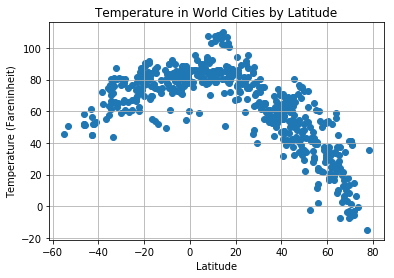

In [7]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#Latitude vs. Temperature Plot
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities by Latitude")
plt.ylabel("Temperature (Fareninheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature_In_World_Cities.png")

# Show plot
plt.show()


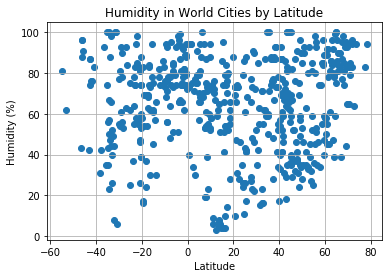

In [8]:
#Latitude vs. Humidity Plot

# Build a scatter plot for each data type
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities by Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_In_World_Cities.png")

# Show plot
plt.show()

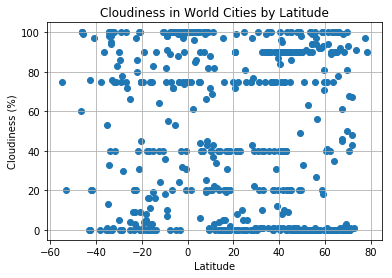

In [9]:
#Latitude vs. Cloudiness Plot
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities by Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_In_World_Cities.png")

# Show plot
plt.show()

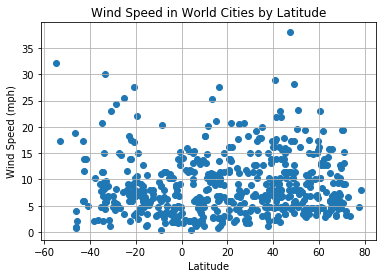

In [10]:
#Latitude vs. Wind Speed Plot
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities by Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_In_World_Cities.png")

# Show plot
plt.show()